# EuroSciPy 2018: NumPy tutorial

## Let's do some slicing

In [1]:
mylist = list(range(10))
print(mylist)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


Use slicing to produce the following outputs:

[2, 3, 4, 5]

In [2]:
mylist[2:6]

[2, 3, 4, 5]

[0, 1, 2, 3, 4]

In [3]:
mylist[:5]

[0, 1, 2, 3, 4]

[6, 7, 8, 9]

In [4]:
mylist[6:]

[6, 7, 8, 9]

[0, 2, 4, 6, 8]

In [5]:
mylist[::2]

[0, 2, 4, 6, 8]

[9, 8, 7, 6, 5, 4, 3, 2, 1, 0]

In [6]:
mylist[::-1]

[9, 8, 7, 6, 5, 4, 3, 2, 1, 0]

[7, 5, 3]

In [7]:
mylist[7:2:-2]

[7, 5, 3]

## Matrices and lists of lists

In [8]:
matrix = [[0, 1, 2],
          [3, 4, 5],
          [6, 7, 8]]

Get the second row by slicing twice

In [9]:
matrix[1][:]

[3, 4, 5]

Try to get the second column by slicing. Do not use a list comprehension!

In [10]:
matrix[:][1]

[3, 4, 5]

## Getting started

Import the NumPy package

In [11]:
import numpy as np

## Create an array

In [12]:
np.lookfor('create array')

Search results for 'create array'
---------------------------------
numpy.array
    Create an array.
numpy.memmap
    Create a memory-map to an array stored in a *binary* file on disk.
numpy.diagflat
    Create a two-dimensional array with the flattened input as a diagonal.
numpy.fromiter
    Create a new 1-dimensional array from an iterable object.
numpy.partition
    Return a partitioned copy of an array.
numpy.ctypeslib.as_array
    Create a numpy array from a ctypes array or a ctypes POINTER.
numpy.ma.diagflat
    Create a two-dimensional array with the flattened input as a diagonal.
numpy.ma.make_mask
    Create a boolean mask from an array.
numpy.ctypeslib.as_ctypes
    Create and return a ctypes object from a numpy array.  Actually
numpy.ma.mrecords.fromarrays
    Creates a mrecarray from a (flat) list of masked arrays.
numpy.ma.mvoid.__new__
    Create a new masked array from scratch.
numpy.lib.format.open_memmap
    Open a .npy file as a memory-mapped array.
numpy.ma.MaskedArr

In [13]:
help(np.array)

Help on built-in function array in module numpy.core.multiarray:

array(...)
    array(object, dtype=None, copy=True, order='K', subok=False, ndmin=0)
    
    Create an array.
    
    Parameters
    ----------
    object : array_like
        An array, any object exposing the array interface, an object whose
        __array__ method returns an array, or any (nested) sequence.
    dtype : data-type, optional
        The desired data-type for the array.  If not given, then the type will
        be determined as the minimum type required to hold the objects in the
        sequence.  This argument can only be used to 'upcast' the array.  For
        downcasting, use the .astype(t) method.
    copy : bool, optional
        If true (default), then the object is copied.  Otherwise, a copy will
        only be made if __array__ returns a copy, if obj is a nested sequence,
        or if a copy is needed to satisfy any of the other requirements
        (`dtype`, `order`, etc.).
    order : {'K'

The variable `matrix` contains a list of lists. Turn it into an `ndarray` and assign it to the variable `myarray`. Verify that its type is correct.

In [14]:
myarray = np.array(matrix)
myarray

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [15]:
type(myarray)

numpy.ndarray

For practicing purposes, arrays can conveniently be created with the `arange` method.

In [16]:
myarray1 = np.arange(6)
myarray1

array([0, 1, 2, 3, 4, 5])

In [17]:
def array_attributes(a):
    for attr in ('ndim', 'size', 'itemsize', 'dtype', 'shape', 'strides'):
        print('{:8s}: {}'.format(attr, getattr(a, attr)))

In [18]:
array_attributes(myarray1)

ndim    : 1
size    : 6
itemsize: 8
dtype   : int64
shape   : (6,)
strides : (8,)


## Data types

Use `np.array()` to create arrays containing
 * floats
 * complex numbers
 * booleans
 * strings
 
and check the `dtype` attribute.

In [19]:
np.array([[1.0, 2.0], [3.0, 4.0]]).dtype

dtype('float64')

In [20]:
np.array([[1+2j, 3+4j], [3-4j, 1-2j]]).dtype

dtype('complex128')

In [21]:
np.array([True, False]).dtype

dtype('bool')

In [22]:
np.array(['Python', 'EuroSciPy', 'Erlangen']).dtype

dtype('<U9')

Do you understand what is happening in the following statement?

In [23]:
np.arange(1, 160, 10, dtype=np.int8)

array([   1,   11,   21,   31,   41,   51,   61,   71,   81,   91,  101,
        111,  121, -125, -115, -105], dtype=int8)

## Strides

In [24]:
myarray2 = myarray1.reshape(2, 3)
myarray2

array([[0, 1, 2],
       [3, 4, 5]])

In [25]:
array_attributes(myarray2)

ndim    : 2
size    : 6
itemsize: 8
dtype   : int64
shape   : (2, 3)
strides : (24, 8)


In [26]:
myarray3 = myarray1.reshape(3, 2)

In [27]:
array_attributes(myarray3)

ndim    : 2
size    : 6
itemsize: 8
dtype   : int64
shape   : (3, 2)
strides : (16, 8)


## Views

Set the first entry of `myarray1` to a new value, e.g. 42.

In [28]:
myarray1[0] = 42

What happened to `myarray2`?

In [29]:
myarray2

array([[42,  1,  2],
       [ 3,  4,  5]])

What happens when a matrix is transposed?

In [30]:
a = np.arange(9).reshape(3, 3)
a

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [31]:
a.T

array([[0, 3, 6],
       [1, 4, 7],
       [2, 5, 8]])

Check the strides!

In [32]:
a.strides

(24, 8)

In [33]:
a.T.strides

(8, 24)

## View versus copy

identical object

In [34]:
a = np.arange(4)
b = a
id(a), id(b)

(140476753788400, 140476753788400)

view: a different object working on the same data

In [35]:
b = a[:]
id(a), id(b)

(140476753788400, 140476753788480)

In [36]:
a[0] = 42
a, b

(array([42,  1,  2,  3]), array([42,  1,  2,  3]))

an independent copy

In [37]:
a = np.arange(4)
b = np.copy(a)
id(a), id(b)

(140476753788080, 140476753788640)

In [38]:
a[0] = 42
a, b

(array([42,  1,  2,  3]), array([0, 1, 2, 3]))

## Some array creation routines

### numerical ranges

`arange(`*start*, *stop*, *step*`)`, *stop* is not included in the array

In [39]:
np.arange(5, 30, 5)

array([ 5, 10, 15, 20, 25])

`arange` resembles `range`, but also works for floats

Create the array [1, 1.1, 1.2, 1.3, 1.4, 1.5]

In [40]:
np.arange(1, 1.55, 0.1)

array([1. , 1.1, 1.2, 1.3, 1.4, 1.5])

`linspace(`*start*, *stop*, *num*`)` determines the step to produce *num* equally spaced values, *stop* is included by default

Create the array [1., 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.]

In [41]:
np.linspace(1, 2, 11)

array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ])

For equally spaced values on a logarithmic scale, use `logspace`.

In [42]:
np.logspace(-2, 2, 5)

array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])

In [43]:
np.logspace(0, 4, 9, base=2)

array([ 1.        ,  1.41421356,  2.        ,  2.82842712,  4.        ,
        5.65685425,  8.        , 11.3137085 , 16.        ])

### Application

In [44]:
import matplotlib.pyplot as plt

In [45]:
%matplotlib inline

In [46]:
x = np.linspace(0, 10, 100)
y = np.cos(x)

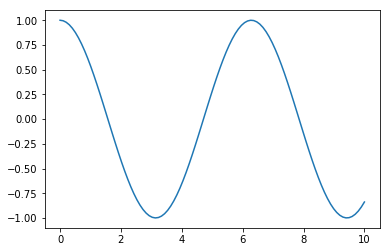

In [47]:
plt.plot(x, y)

### Homogeneous data

In [48]:
np.zeros((4, 4))

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

Create a 4x4 array with integer zeros

In [49]:
np.zeros((4, 4), dtype=int)

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]])

In [50]:
np.ones((2, 3, 3))

array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]])

Create a 3x3 array filled with tens

In [51]:
10*np.ones((3, 3))

array([[10., 10., 10.],
       [10., 10., 10.],
       [10., 10., 10.]])

### Diagonal elements

In [52]:
np.diag([1, 2, 3, 4])

array([[1, 0, 0, 0],
       [0, 2, 0, 0],
       [0, 0, 3, 0],
       [0, 0, 0, 4]])

`diag` has an optional argument `k`. Try to find out what its effect is.

In [53]:
np.diag([1, 2, 3, 4], k=1)

array([[0, 1, 0, 0, 0],
       [0, 0, 2, 0, 0],
       [0, 0, 0, 3, 0],
       [0, 0, 0, 0, 4],
       [0, 0, 0, 0, 0]])

Replace the 1d array by a 2d array. What does `diag` do?

In [54]:
np.diag(np.arange(16).reshape(4, 4))

array([ 0,  5, 10, 15])

In [55]:
np.info(np.eye)

 eye(N, M=None, k=0, dtype=<class 'float'>, order='C')

Return a 2-D array with ones on the diagonal and zeros elsewhere.

Parameters
----------
N : int
  Number of rows in the output.
M : int, optional
  Number of columns in the output. If None, defaults to `N`.
k : int, optional
  Index of the diagonal: 0 (the default) refers to the main diagonal,
  a positive value refers to an upper diagonal, and a negative value
  to a lower diagonal.
dtype : data-type, optional
  Data-type of the returned array.
order : {'C', 'F'}, optional
    Whether the output should be stored in row-major (C-style) or
    column-major (Fortran-style) order in memory.

    .. versionadded:: 1.14.0

Returns
-------
I : ndarray of shape (N,M)
  An array where all elements are equal to zero, except for the `k`-th
  diagonal, whose values are equal to one.

See Also
--------
identity : (almost) equivalent function
diag : diagonal 2-D array from a 1-D array specified by the user.

Examples
--------
>>> np.eye(2, dt

Create the 3x3 array

```[[2, 1, 0],
 [1, 2, 1],
 [0, 1, 2]]
```

In [56]:
2*np.eye(3)+np.eye(3, k=1)+np.eye(3, k=-1)

array([[2., 1., 0.],
       [1., 2., 1.],
       [0., 1., 2.]])

### Random numbers

In [57]:
np.random.rand(5, 2)

array([[0.50755507, 0.0211933 ],
       [0.43352176, 0.44631306],
       [0.23881999, 0.83024573],
       [0.74476418, 0.586479  ],
       [0.49286785, 0.48735588]])

In [58]:
np.random.seed(1234)
np.random.rand(5, 2)

array([[0.19151945, 0.62210877],
       [0.43772774, 0.78535858],
       [0.77997581, 0.27259261],
       [0.27646426, 0.80187218],
       [0.95813935, 0.87593263]])

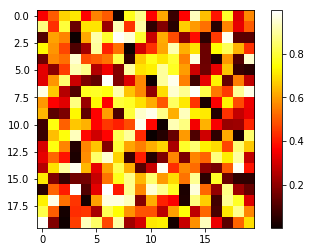

In [59]:
data = np.random.rand(20, 20)
plt.imshow(data, cmap=plt.cm.hot, interpolation='none')
plt.colorbar()

([array([14., 11., 25., 26.,  5., 19.]),
  array([20., 11., 13., 18., 14., 24.]),
  array([13., 19., 16., 25., 13., 14.])],
 array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 <a list of 3 Lists of Patches objects>)

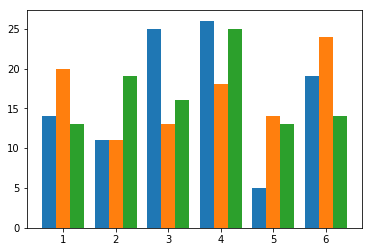

In [60]:
casts = np.random.randint(1, 7, (100, 3))
plt.hist(casts, np.linspace(0.5, 6.5, 7))

## Indexing and slicing

### 1d arrays

In [61]:
a = np.arange(10)

Create the array [7, 8, 9]

In [62]:
a[7:]

array([7, 8, 9])

Create the array [2, 4, 6, 8]

In [63]:
a[2::2]

array([2, 4, 6, 8])

Create the array [9, 8, 7, 6, 5, 4, 3, 2, 1, 0]

In [64]:
a[::-1]

array([9, 8, 7, 6, 5, 4, 3, 2, 1, 0])

### Higher dimensions

In [65]:
a = np.arange(40).reshape(5, 8)

In [66]:
a[-3:, -3:]

array([[21, 22, 23],
       [29, 30, 31],
       [37, 38, 39]])

In [67]:
a[:, 3]

array([ 3, 11, 19, 27, 35])

In [68]:
a[1, 3:6]

array([11, 12, 13])

In [69]:
a[1::2, ::3]

array([[ 8, 11, 14],
       [24, 27, 30]])

## Fancy indexing ‒ Boolean mask

In [70]:
a = np.arange(40).reshape(5, 8)

In [71]:
a %3 == 0

array([[ True, False, False,  True, False, False,  True, False],
       [False,  True, False, False,  True, False, False,  True],
       [False, False,  True, False, False,  True, False, False],
       [ True, False, False,  True, False, False,  True, False],
       [False,  True, False, False,  True, False, False,  True]])

In [72]:
a[a %3 == 0]

array([ 0,  3,  6,  9, 12, 15, 18, 21, 24, 27, 30, 33, 36, 39])

In [73]:
a[(1, 1, 2, 2, 3, 3), (3, 4, 2, 5, 3, 4)]

array([11, 12, 18, 21, 27, 28])

## Application: sieve of Eratosthenes

In [74]:
nmax = 50
integers = np.arange(nmax)
is_prime = np.ones(nmax, dtype=bool)
is_prime[:2] = False
for j in range(2, int(np.sqrt(nmax))+1):
    if is_prime[j]:
        print(integers[is_prime])
        is_prime[j*j::j] = False
print(integers[is_prime])

[ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49]
[ 2  3  5  7  9 11 13 15 17 19 21 23 25 27 29 31 33 35 37 39 41 43 45 47
 49]
[ 2  3  5  7 11 13 17 19 23 25 29 31 35 37 41 43 47 49]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 49]
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47]


## Axes

Create an array and calculate the sum over all elements

In [75]:
a = np.arange(9).reshape(3, 3)
a

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

Now calculate the sum along axis 0 ...

In [76]:
np.sum(a, axis=0)

array([ 9, 12, 15])

and now along axis 1

In [77]:
np.sum(a, axis=1)

array([ 3, 12, 21])

Identify the axis in the following array

In [78]:
a = np.arange(24).reshape(2, 3, 4)
a

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

In [79]:
np.sum(a, axis=0)

array([[12, 14, 16, 18],
       [20, 22, 24, 26],
       [28, 30, 32, 34]])

In [80]:
np.sum(a, axis=1)

array([[12, 15, 18, 21],
       [48, 51, 54, 57]])

In [81]:
np.sum(a, axis=2)

array([[ 6, 22, 38],
       [54, 70, 86]])

## Axes in more than two dimensions

Create a three-dimensional array

In [82]:
a = np.arange(24).reshape(2, 3, 4)

Produce a two-dimensional array by cutting along axis 0 ...

In [83]:
a[0, :, :]

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

and axis 1 ...

In [84]:
a[:, 0, :]

array([[ 0,  1,  2,  3],
       [12, 13, 14, 15]])

and axis 2

In [85]:
a[:, :, 0]

array([[ 0,  4,  8],
       [12, 16, 20]])

What do you get by simply using the index `[0]`?

In [86]:
a[0]

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

What do you get by using `[..., 0]`?

In [87]:
a[..., 0]

array([[ 0,  4,  8],
       [12, 16, 20]])

## Exploring numerical operations

In [88]:
a = np.arange(4)
b = np.arange(4, 8)
a, b

(array([0, 1, 2, 3]), array([4, 5, 6, 7]))

In [89]:
a+b

array([ 4,  6,  8, 10])

In [90]:
a*b

array([ 0,  5, 12, 21])

Operations are elementwise. Check this by multiplying two 2d array...

In [91]:
a = np.arange(4).reshape(2, 2)
b = np.arange(4, 8).reshape(2, 2)
a, b

(array([[0, 1],
        [2, 3]]), array([[4, 5],
        [6, 7]]))

In [92]:
a*b

array([[ 0,  5],
       [12, 21]])

... and now do a real matrix multiplication

In [93]:
np.dot(a, b)

array([[ 6,  7],
       [26, 31]])

In [94]:
a.dot(b)

array([[ 6,  7],
       [26, 31]])

In [95]:
a @ b

array([[ 6,  7],
       [26, 31]])

## Application: Random walk

(-69.59429081283598,
 130.99507623004234,
 -141.77608837279524,
 113.40203446890828)

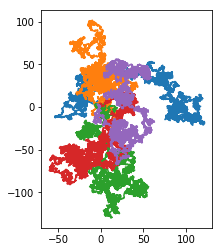

In [96]:
length_of_walk = 10000
realizations = 5
angles = 2*np.pi*np.random.rand(length_of_walk, realizations)
x = np.cumsum(np.cos(angles), axis=0)
y = np.cumsum(np.sin(angles), axis=0)
plt.plot(x, y)
plt.axis('scaled')

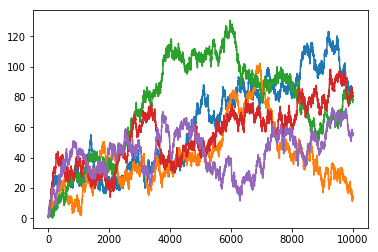

In [97]:
plt.plot(np.hypot(x, y))

(-499.95000000000005, 10498.95, -354.00640942651603, 7456.134597956837)

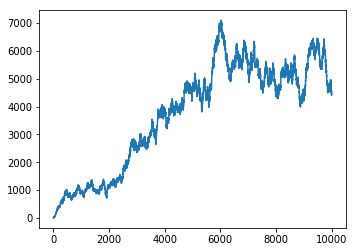

In [98]:
plt.plot(np.mean(x**2+y**2, axis=1))
plt.axis('scaled')

## Let's check the speed

In [99]:
%%timeit a = np.arange(1000000)
a**2

1.19 ms ± 16.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [100]:
%%timeit xvals = range(1000000)
[xval**2 for xval in xvals]

240 ms ± 5.29 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [101]:
%%timeit a = np.arange(100000)
np.sin(a)

2.24 ms ± 74.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [102]:
import math

In [103]:
%%timeit xvals = range(100000)
[math.sin(xval) for xval in xvals]

16.5 ms ± 462 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


## Broadcasting

In [104]:
a = np.arange(12).reshape(3, 4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [105]:
a+1

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

In [106]:
a+np.arange(4)

array([[ 0,  2,  4,  6],
       [ 4,  6,  8, 10],
       [ 8, 10, 12, 14]])

In [107]:
a+np.arange(3)

ValueError: operands could not be broadcast together with shapes (3,4) (3,) 

In [108]:
np.arange(3)

array([0, 1, 2])

In [109]:
np.arange(3).reshape(3, 1)

array([[0],
       [1],
       [2]])

In [110]:
a+np.arange(3).reshape(3, 1)

array([[ 0,  1,  2,  3],
       [ 5,  6,  7,  8],
       [10, 11, 12, 13]])

In [111]:
%%timeit a = np.arange(10000).reshape(100, 100); b = np.ones((100, 100))
a+b

13.8 µs ± 234 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [112]:
%%timeit a = np.arange(10000).reshape(100, 100)
a+1

4.34 µs ± 44.8 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


Create a multiplication table for the numbers from 1 to 10 starting from two appropriately chosen 1d arrays.

In [113]:
np.arange(1, 11)*np.arange(1, 11).reshape(10, 1)

array([[  1,   2,   3,   4,   5,   6,   7,   8,   9,  10],
       [  2,   4,   6,   8,  10,  12,  14,  16,  18,  20],
       [  3,   6,   9,  12,  15,  18,  21,  24,  27,  30],
       [  4,   8,  12,  16,  20,  24,  28,  32,  36,  40],
       [  5,  10,  15,  20,  25,  30,  35,  40,  45,  50],
       [  6,  12,  18,  24,  30,  36,  42,  48,  54,  60],
       [  7,  14,  21,  28,  35,  42,  49,  56,  63,  70],
       [  8,  16,  24,  32,  40,  48,  56,  64,  72,  80],
       [  9,  18,  27,  36,  45,  54,  63,  72,  81,  90],
       [ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100]])

As an alternative to `reshape` one can add additional axes with `newaxes`:

In [114]:
a = np.arange(5)
b = a[:, np.newaxis]

Check the shapes.

In [115]:
a.shape, b.shape

((5,), (5, 1))

## Functions of two variables

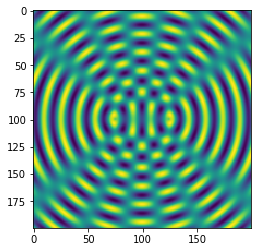

In [116]:
x = np.linspace(-40, 40, 200)
y = x[:, np.newaxis]
z = np.sin(np.hypot(x-10, y))+np.sin(np.hypot(x+10, y))
plt.imshow(z, cmap='viridis')

In [117]:
x, y = np.mgrid[-10:10:0.1, -10:10:0.1]

In [118]:
x

array([[-10. , -10. , -10. , ..., -10. , -10. , -10. ],
       [ -9.9,  -9.9,  -9.9, ...,  -9.9,  -9.9,  -9.9],
       [ -9.8,  -9.8,  -9.8, ...,  -9.8,  -9.8,  -9.8],
       ...,
       [  9.7,   9.7,   9.7, ...,   9.7,   9.7,   9.7],
       [  9.8,   9.8,   9.8, ...,   9.8,   9.8,   9.8],
       [  9.9,   9.9,   9.9, ...,   9.9,   9.9,   9.9]])

In [119]:
y

array([[-10. ,  -9.9,  -9.8, ...,   9.7,   9.8,   9.9],
       [-10. ,  -9.9,  -9.8, ...,   9.7,   9.8,   9.9],
       [-10. ,  -9.9,  -9.8, ...,   9.7,   9.8,   9.9],
       ...,
       [-10. ,  -9.9,  -9.8, ...,   9.7,   9.8,   9.9],
       [-10. ,  -9.9,  -9.8, ...,   9.7,   9.8,   9.9],
       [-10. ,  -9.9,  -9.8, ...,   9.7,   9.8,   9.9]])

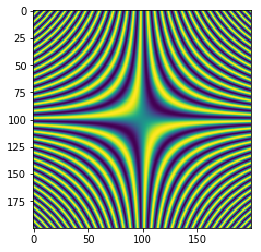

In [120]:
plt.imshow(np.sin(x*y))

In [121]:
x, y = np.mgrid[-10:10:50j, -10:10:50j]

In [122]:
x

array([[-10.        , -10.        , -10.        , ..., -10.        ,
        -10.        , -10.        ],
       [ -9.59183673,  -9.59183673,  -9.59183673, ...,  -9.59183673,
         -9.59183673,  -9.59183673],
       [ -9.18367347,  -9.18367347,  -9.18367347, ...,  -9.18367347,
         -9.18367347,  -9.18367347],
       ...,
       [  9.18367347,   9.18367347,   9.18367347, ...,   9.18367347,
          9.18367347,   9.18367347],
       [  9.59183673,   9.59183673,   9.59183673, ...,   9.59183673,
          9.59183673,   9.59183673],
       [ 10.        ,  10.        ,  10.        , ...,  10.        ,
         10.        ,  10.        ]])

In [123]:
y

array([[-10.        ,  -9.59183673,  -9.18367347, ...,   9.18367347,
          9.59183673,  10.        ],
       [-10.        ,  -9.59183673,  -9.18367347, ...,   9.18367347,
          9.59183673,  10.        ],
       [-10.        ,  -9.59183673,  -9.18367347, ...,   9.18367347,
          9.59183673,  10.        ],
       ...,
       [-10.        ,  -9.59183673,  -9.18367347, ...,   9.18367347,
          9.59183673,  10.        ],
       [-10.        ,  -9.59183673,  -9.18367347, ...,   9.18367347,
          9.59183673,  10.        ],
       [-10.        ,  -9.59183673,  -9.18367347, ...,   9.18367347,
          9.59183673,  10.        ]])

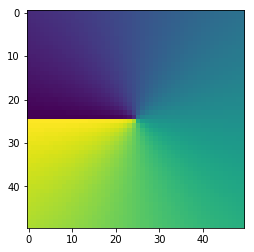

In [124]:
plt.imshow(np.arctan2(x, y))

It is natural to use broadcasting. Check out what happens when you replace `mgrid` by `ogrid`.

In [125]:
x, y = np.ogrid[-10:10:0.1, -10:10:0.1]

In [126]:
x

array([[-10. ],
       [ -9.9],
       [ -9.8],
       [ -9.7],
       [ -9.6],
       [ -9.5],
       [ -9.4],
       [ -9.3],
       [ -9.2],
       [ -9.1],
       [ -9. ],
       [ -8.9],
       [ -8.8],
       [ -8.7],
       [ -8.6],
       [ -8.5],
       [ -8.4],
       [ -8.3],
       [ -8.2],
       [ -8.1],
       [ -8. ],
       [ -7.9],
       [ -7.8],
       [ -7.7],
       [ -7.6],
       [ -7.5],
       [ -7.4],
       [ -7.3],
       [ -7.2],
       [ -7.1],
       [ -7. ],
       [ -6.9],
       [ -6.8],
       [ -6.7],
       [ -6.6],
       [ -6.5],
       [ -6.4],
       [ -6.3],
       [ -6.2],
       [ -6.1],
       [ -6. ],
       [ -5.9],
       [ -5.8],
       [ -5.7],
       [ -5.6],
       [ -5.5],
       [ -5.4],
       [ -5.3],
       [ -5.2],
       [ -5.1],
       [ -5. ],
       [ -4.9],
       [ -4.8],
       [ -4.7],
       [ -4.6],
       [ -4.5],
       [ -4.4],
       [ -4.3],
       [ -4.2],
       [ -4.1],
       [ -4. ],
       [ -3.9],
       [

In [127]:
y

array([[-10. ,  -9.9,  -9.8,  -9.7,  -9.6,  -9.5,  -9.4,  -9.3,  -9.2,
         -9.1,  -9. ,  -8.9,  -8.8,  -8.7,  -8.6,  -8.5,  -8.4,  -8.3,
         -8.2,  -8.1,  -8. ,  -7.9,  -7.8,  -7.7,  -7.6,  -7.5,  -7.4,
         -7.3,  -7.2,  -7.1,  -7. ,  -6.9,  -6.8,  -6.7,  -6.6,  -6.5,
         -6.4,  -6.3,  -6.2,  -6.1,  -6. ,  -5.9,  -5.8,  -5.7,  -5.6,
         -5.5,  -5.4,  -5.3,  -5.2,  -5.1,  -5. ,  -4.9,  -4.8,  -4.7,
         -4.6,  -4.5,  -4.4,  -4.3,  -4.2,  -4.1,  -4. ,  -3.9,  -3.8,
         -3.7,  -3.6,  -3.5,  -3.4,  -3.3,  -3.2,  -3.1,  -3. ,  -2.9,
         -2.8,  -2.7,  -2.6,  -2.5,  -2.4,  -2.3,  -2.2,  -2.1,  -2. ,
         -1.9,  -1.8,  -1.7,  -1.6,  -1.5,  -1.4,  -1.3,  -1.2,  -1.1,
         -1. ,  -0.9,  -0.8,  -0.7,  -0.6,  -0.5,  -0.4,  -0.3,  -0.2,
         -0.1,   0. ,   0.1,   0.2,   0.3,   0.4,   0.5,   0.6,   0.7,
          0.8,   0.9,   1. ,   1.1,   1.2,   1.3,   1.4,   1.5,   1.6,
          1.7,   1.8,   1.9,   2. ,   2.1,   2.2,   2.3,   2.4,   2.5,
      

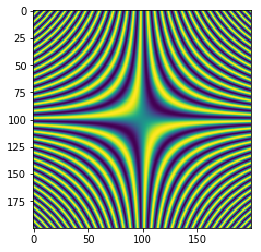

In [128]:
plt.imshow(np.sin(x*y))

In [129]:
x, y = np.ogrid[-10:10:50j, -10:10:50j]

In [130]:
x

array([[-10.        ],
       [ -9.59183673],
       [ -9.18367347],
       [ -8.7755102 ],
       [ -8.36734694],
       [ -7.95918367],
       [ -7.55102041],
       [ -7.14285714],
       [ -6.73469388],
       [ -6.32653061],
       [ -5.91836735],
       [ -5.51020408],
       [ -5.10204082],
       [ -4.69387755],
       [ -4.28571429],
       [ -3.87755102],
       [ -3.46938776],
       [ -3.06122449],
       [ -2.65306122],
       [ -2.24489796],
       [ -1.83673469],
       [ -1.42857143],
       [ -1.02040816],
       [ -0.6122449 ],
       [ -0.20408163],
       [  0.20408163],
       [  0.6122449 ],
       [  1.02040816],
       [  1.42857143],
       [  1.83673469],
       [  2.24489796],
       [  2.65306122],
       [  3.06122449],
       [  3.46938776],
       [  3.87755102],
       [  4.28571429],
       [  4.69387755],
       [  5.10204082],
       [  5.51020408],
       [  5.91836735],
       [  6.32653061],
       [  6.73469388],
       [  7.14285714],
       [  7

In [131]:
y

array([[-10.        ,  -9.59183673,  -9.18367347,  -8.7755102 ,
         -8.36734694,  -7.95918367,  -7.55102041,  -7.14285714,
         -6.73469388,  -6.32653061,  -5.91836735,  -5.51020408,
         -5.10204082,  -4.69387755,  -4.28571429,  -3.87755102,
         -3.46938776,  -3.06122449,  -2.65306122,  -2.24489796,
         -1.83673469,  -1.42857143,  -1.02040816,  -0.6122449 ,
         -0.20408163,   0.20408163,   0.6122449 ,   1.02040816,
          1.42857143,   1.83673469,   2.24489796,   2.65306122,
          3.06122449,   3.46938776,   3.87755102,   4.28571429,
          4.69387755,   5.10204082,   5.51020408,   5.91836735,
          6.32653061,   6.73469388,   7.14285714,   7.55102041,
          7.95918367,   8.36734694,   8.7755102 ,   9.18367347,
          9.59183673,  10.        ]])

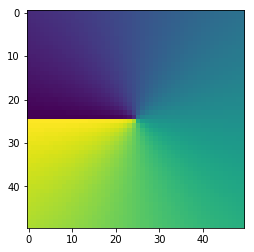

In [132]:
plt.imshow(np.arctan2(x, y))

## Application: Mandelbrot set

(300, 300)


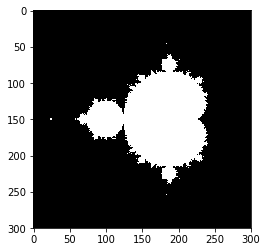

In [133]:
npts = 300
y, x = np.ogrid[-1.5:1.5:300j, -2:1:300j]
c = x+1j*y
z = c
for n in range(50):
    z = z**2+c
imdata = (np.abs(z) < 50)
print(imdata.shape)
plt.imshow(imdata, cmap='gray')

## Application: π from random numbers

Create an array of random numbers and determine the fraction of points with distance from the origin smaller than one. Determine an approximation for π.

In [134]:
npts = 1000000
pts = np.random.rand(2*npts).reshape(2, -1)
4*np.count_nonzero(np.hypot(pts[0], pts[1]) < 1)/npts

3.14006

## Linear Algebra in NumPy

In [135]:
import numpy.linalg as LA

In [136]:
a = np.arange(4).reshape(2, 2)
eigenvalues, eigenvectors = LA.eig(a)
eigenvalues

array([-0.56155281,  3.56155281])

In [137]:
eigenvectors

array([[-0.87192821, -0.27032301],
       [ 0.48963374, -0.96276969]])

Explore whether the eigenvectors are the rows or the columns.

In [138]:
a @ eigenvectors[:, 0]

array([ 0.48963374, -0.2749552 ])

In [139]:
eigenvalues[0]*eigenvectors[:, 0]

array([ 0.48963374, -0.2749552 ])

Try out `eigvals` and other methods offered by `linalg` which your are interested in

Determine the eigenvalue larger than one appearing in the Fibonacci problem. Verify the result by calculating the ratio of successive Fibonacci numbers. Do you recognize the result?

In [140]:
LA.eigvals(np.array([[1, 1], [1, 0]]))

array([ 1.61803399, -0.61803399])

In [141]:
fnp1, fn = 1, 1
for n in range(20):
    fnp1, fn = fnp1+fn, fnp1
    print(fnp1/fn)

2.0
1.5
1.6666666666666667
1.6
1.625
1.6153846153846154
1.619047619047619
1.6176470588235294
1.6181818181818182
1.6179775280898876
1.6180555555555556
1.6180257510729614
1.6180371352785146
1.618032786885246
1.618034447821682
1.6180338134001253
1.618034055727554
1.6180339631667064
1.6180339985218033
1.618033985017358


## Application: Brownian motion

1. Simulate several trajectories for a one-dimensional
Brownian motion  
Hint: `np.random.choice`
2. Plot the mean distance from the origin as a function
of time
3. Plot the variance of the trajectories as a function of
time


In [142]:
stories = 10
length = 1000
jumps = np.random.choice(np.array([-1, 1]), (stories, length))
positions = np.cumsum(jumps, axis=1)

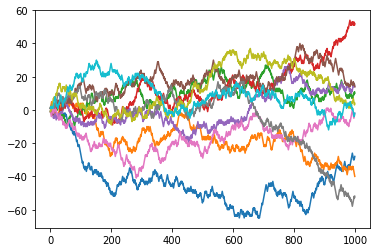

In [143]:
plt.plot(positions.T)

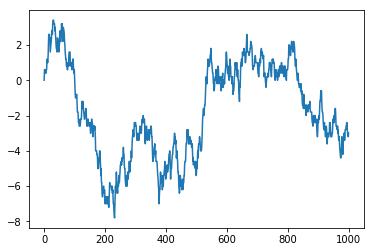

In [144]:
plt.plot(np.mean(positions, axis=0))

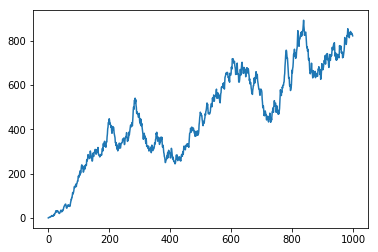

In [145]:
plt.plot(np.var(positions, axis=0))

## Application: identify entry closest to ½

Create a 2d array containing random numbers and generate a vector containing for each row the entry closest to one-half.

In [146]:
a = np.random.rand(20).reshape(4, 5)
a

array([[0.97693514, 0.69727172, 0.15565874, 0.56088656, 0.84230662],
       [0.05671459, 0.41826831, 0.08484946, 0.464235  , 0.63839632],
       [0.14586814, 0.72446303, 0.64734808, 0.89229855, 0.3092546 ],
       [0.25935843, 0.53772348, 0.05694391, 0.54111575, 0.89706703]])

In [147]:
a[np.arange(4), np.argsort(np.abs(a-0.5), axis=1)[:, 0]]

array([0.56088656, 0.464235  , 0.64734808, 0.53772348])

## Polynomials

In [148]:
from numpy.polynomial import polynomial as P

Powers increase from left to right (index corresponds to power)

In [149]:
p1 = P.Polynomial([1, 2])

In [150]:
p1.degree()

1

In [151]:
p1.roots()

array([-0.5])

In [152]:
p4 = P.Polynomial([24, -50, 35, -10, 1])

In [153]:
p4.degree()

4

In [154]:
p4.roots()

array([1., 2., 3., 4.])

In [155]:
p4.deriv()

Polynomial([-50.,  70., -30.,   4.], domain=[-1.,  1.], window=[-1.,  1.])

In [156]:
p4.integ()

Polynomial([  0.        ,  24.        , -25.        ,  11.66666667,
        -2.5       ,   0.2       ], domain=[-1.,  1.], window=[-1.,  1.])

In [157]:
P.polydiv(p4.coef, p1.coef)

(array([-35.0625,  20.125 ,  -5.25  ,   0.5   ]), array([59.0625]))

## Application: polynomial fit

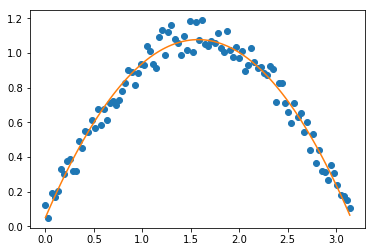

In [158]:
x = np.linspace(0, np.pi, 100)
y = np.sin(x)+0.2*np.random.rand(100)
plt.plot(x, y, 'o')
fit = P.Polynomial(P.polyfit(x, y, 2))
plt.plot(x, fit(x))

## Application: image manipulation

In [159]:
from scipy import misc
face = misc.face(gray=True)
face

array([[114, 130, 145, ..., 119, 129, 137],
       [ 83, 104, 123, ..., 118, 134, 146],
       [ 68,  88, 109, ..., 119, 134, 145],
       ...,
       [ 98, 103, 116, ..., 144, 143, 143],
       [ 94, 104, 120, ..., 143, 142, 142],
       [ 94, 106, 119, ..., 142, 141, 140]], dtype=uint8)

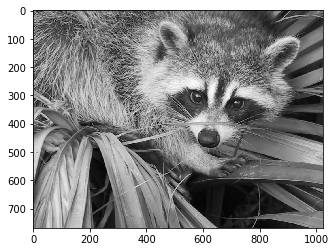

In [160]:
plt.imshow(face, cmap=plt.cm.gray)

Modify this image, e.g. convert it to a black and white image, put a black frame, change the contrast, ...

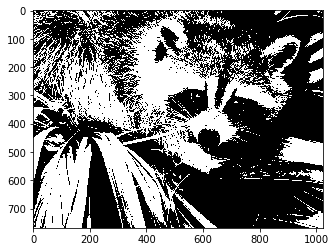

In [161]:
plt.imshow(face > 128, cmap=plt.cm.gray)

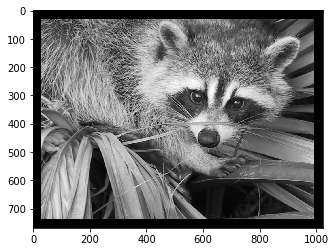

In [162]:
framedface = np.zeros_like(face)
framedface[30:-31, 30:-31] = face[30:-31, 30:-31]
plt.imshow(framedface, cmap=plt.cm.gray)

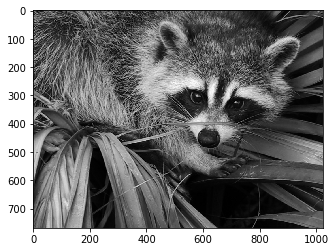

In [163]:
plt.imshow(255*(face/255)**1.5, cmap=plt.cm.gray)

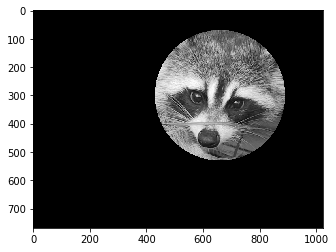

In [164]:
sy, sx = face.shape
y, x = np.ogrid[:sy, :sx]
centerx, centery = 660, 300
mask = ((y - centery)**2 + (x - centerx)**2) > 230**2
face[mask] = 0
plt.imshow(face, cmap=plt.cm.gray)